In [1165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [1166]:
AdvancedBattingDf = pd.read_csv('AdvancedBattingClean.csv')
AdvancedBattingDf.drop('index', axis=1, inplace=True)
temp = AdvancedBattingDf.loc[AdvancedBattingDf.Playoff=='Yes',['Tm','Year']]
temp.loc[AdvancedBattingDf.Year==2012,'Tm']                                                      

331          Atlanta Braves
332       Baltimore Orioles
336         Cincinnati Reds
339          Detroit Tigers
348        New York Yankees
349       Oakland Athletics
354    San Francisco Giants
355     St. Louis Cardinals
357           Texas Rangers
359    Washington Nationals
Name: Tm, dtype: object

# Cleaning 2022 Data

In [1167]:
data2022 = pd.read_csv('MLB2022_Data.txt')
standardBatting2022=pd.read_csv('StandardBatting_2022Data.txt')
data2022['G']=standardBatting2022['G']
data2022.info()
data2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tm      30 non-null     object 
 1   rOBA    30 non-null     float64
 2   Rbat+   30 non-null     int64  
 3   BAbip   30 non-null     float64
 4   ISO     30 non-null     float64
 5   HR%     30 non-null     object 
 6   SO%     30 non-null     object 
 7   BB%     30 non-null     object 
 8   EV      30 non-null     float64
 9   HardH%  30 non-null     object 
 10  LD%     30 non-null     object 
 11  GB%     30 non-null     object 
 12  FB%     30 non-null     object 
 13  GB/FB   30 non-null     float64
 14  Pull%   30 non-null     object 
 15  Cent%   30 non-null     object 
 16  Oppo%   30 non-null     object 
 17  WPA     30 non-null     float64
 18  cWPA    30 non-null     object 
 19  RE24    30 non-null     float64
 20  RS%     30 non-null     object 
 21  SB%     30 non-null     object 
 22  XBT%

,Tm,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,EV,HardH%,...,Pull%,Cent%,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%,G
0,Arizona Diamondbacks,0.309,94,0.268,0.159,3.0%,22.2%,9.3%,87.2,36.6%,...,33.2%,50.6%,16.1%,-3.6,-1.7%,-26.3,31%,75%,48%,120
1,Atlanta Braves,0.335,107,0.300,0.194,4.1%,24.5%,7.7%,89.8,43.5%,...,31.2%,52.7%,16.1%,1.6,0.5%,21.9,32%,75%,51%,122
2,Baltimore Orioles,0.313,99,0.286,0.152,2.7%,23.1%,7.6%,88.1,39.3%,...,31.0%,52.0%,17.0%,-4.7,-2.4%,-46.9,31%,76%,48%,120
3,Boston Red Sox,0.319,97,0.305,0.153,2.5%,22.0%,7.5%,89.0,40.8%,...,25.4%,54.7%,19.9%,-6.3,-3.7%,-37.9,32%,72%,38%,121
4,Chicago Cubs,0.321,99,0.300,0.151,2.7%,23.5%,8.5%,88.1,38.4%,...,30.1%,51.0%,18.9%,-11.2,-2.8%,-65.2,29%,74%,43%,119


In [1168]:
def cleanPercent(x):
  x=x[:-1]
  return float(x)/100

data2022['HR%'] = list(map(cleanPercent, data2022['HR%']))
data2022['HardH%'] = list(map(cleanPercent, data2022['HardH%']))
data2022['SO%'] = list(map(cleanPercent, data2022['SO%']))
data2022['BB%'] = list(map(cleanPercent, data2022['BB%']))
data2022['LD%'] = list(map(cleanPercent, data2022['LD%']))
data2022['GB%'] = list(map(cleanPercent, data2022['GB%']))
data2022['FB%'] = list(map(cleanPercent, data2022['FB%']))
data2022['Pull%'] = list(map(cleanPercent, data2022['Pull%']))
data2022['Cent%'] = list(map(cleanPercent, data2022['Cent%']))
data2022['Oppo%'] = list(map(cleanPercent, data2022['Oppo%']))
data2022['cWPA'] = list(map(cleanPercent, data2022['cWPA']))
data2022['RS%'] = list(map(cleanPercent, data2022['RS%']))
data2022['SB%'] = list(map(cleanPercent, data2022['SB%']))
data2022['XBT%'] = list(map(cleanPercent, data2022['XBT%']))

In [1169]:
data2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tm      30 non-null     object 
 1   rOBA    30 non-null     float64
 2   Rbat+   30 non-null     int64  
 3   BAbip   30 non-null     float64
 4   ISO     30 non-null     float64
 5   HR%     30 non-null     float64
 6   SO%     30 non-null     float64
 7   BB%     30 non-null     float64
 8   EV      30 non-null     float64
 9   HardH%  30 non-null     float64
 10  LD%     30 non-null     float64
 11  GB%     30 non-null     float64
 12  FB%     30 non-null     float64
 13  GB/FB   30 non-null     float64
 14  Pull%   30 non-null     float64
 15  Cent%   30 non-null     float64
 16  Oppo%   30 non-null     float64
 17  WPA     30 non-null     float64
 18  cWPA    30 non-null     float64
 19  RE24    30 non-null     float64
 20  RS%     30 non-null     float64
 21  SB%     30 non-null     float64
 22  XBT%

In [1170]:
for col in data2022.columns:
  if col in ['WPA', 'RE24']:
    data2022[col] = data2022[col] * (162 / data2022['G'])
  else:
    continue

In [1171]:
data2022.head()

,Tm,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,EV,HardH%,...,Pull%,Cent%,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%,G
0,Arizona Diamondbacks,0.309,94,0.268,0.159,0.030,0.222,0.093,87.2,0.366,...,0.332,0.506,0.161,-4.860000,-0.017,-35.505000,0.31,0.75,0.48,120
1,Atlanta Braves,0.335,107,0.300,0.194,0.041,0.245,0.077,89.8,0.435,...,0.312,0.527,0.161,2.124590,0.005,29.080328,0.32,0.75,0.51,122
2,Baltimore Orioles,0.313,99,0.286,0.152,0.027,0.231,0.076,88.1,0.393,...,0.310,0.520,0.170,-6.345000,-0.024,-63.315000,0.31,0.76,0.48,120
3,Boston Red Sox,0.319,97,0.305,0.153,0.025,0.220,0.075,89.0,0.408,...,0.254,0.547,0.199,-8.434711,-0.037,-50.742149,0.32,0.72,0.38,121
4,Chicago Cubs,0.321,99,0.300,0.151,0.027,0.235,0.085,88.1,0.384,...,0.301,0.510,0.189,-15.247059,-0.028,-88.759664,0.29,0.74,0.43,119


# Team to Initials Mapping

In [1172]:
MLB_abr_map = {'Arizona Diamondbacks':'ARI', 'Atlanta Braves':'ATL', 'Baltimore Orioles':'BAL',
               'Boston Red Sox':'BOS', 'Chicago Cubs':'CHC', 'Chicago White Sox':'CHW',
               'Cincinnati Reds':'CIN', 'Cleveland Guardians':'CLE', 'Colorado Rockies':'COL',
               'Detroit Tigers':'DET', 'Miami Marlins':'MIA', 'Houston Astros':'HOU', 
               'Kansas City Royals':'KC', 'Los Angeles Angels':'LAA', 'Los Angeles Dodgers':'LAD',
               'Milwaukee Brewers':'MIL', 'Minnesota Twins':'MIN', 'New York Mets':'NYM', 
               'New York Yankees':'NYY', 'Oakland Athletics':'OAK', 'Philadelphia Phillies':'PHI',
               'Pittsburgh Pirates':'PIT', 'San Diego Padres':'SD', 'San Francisco Giants':'SF',
               'Seattle Mariners':'SEA', 'St. Louis Cardinals':'STL', 'Tampa Bay Rays':'TB',
               'Texas Rangers':'TEX', 'Toronto Blue Jays':'TOR', 'Washington Nationals':'WSH'}

# Logistic Regression

In [1173]:
scaler = MinMaxScaler()
ML_Data = AdvancedBattingDf.drop(['Year','Tm','WPA', 'RE24'], axis = 1)
ML_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rOBA     600 non-null    float64
 1   Rbat+    600 non-null    int64  
 2   BAbip    600 non-null    float64
 3   ISO      600 non-null    float64
 4   HR%      600 non-null    float64
 5   SO%      600 non-null    float64
 6   BB%      600 non-null    float64
 7   LD%      600 non-null    float64
 8   GB%      600 non-null    float64
 9   FB%      600 non-null    float64
 10  GB/FB    600 non-null    float64
 11  Pull%    600 non-null    float64
 12  Cent%    600 non-null    float64
 13  Oppo%    600 non-null    float64
 14  cWPA     600 non-null    float64
 15  RS%      600 non-null    float64
 16  SB%      600 non-null    float64
 17  XBT%     600 non-null    float64
 18  Playoff  600 non-null    object 
dtypes: float64(17), int64(1), object(1)
memory usage: 89.2+ KB


In [1174]:
#train-test split
X = ML_Data.drop('Playoff', axis = 1)
Y = ML_Data.Playoff

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
logregModel = LogisticRegression(max_iter = 10000)

In [1175]:
ML_2022Data = data2022.drop(['Tm','HardH%','EV','G','RE24','WPA'], axis = 1)
ML_2022Data = scaler.transform(ML_2022Data)

In [1176]:
LR_accuracy_scores=[]
n_iterations = 100
LR_2022_Predictions=dict()
for iteration in range(n_iterations):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15)
  logregModel.fit(X_train, Y_train)

  predicted = logregModel.predict(X_test)
  actual = Y_test

  LR_accuracy_scores.append(metrics.accuracy_score(actual, predicted))

  pred_2022 = logregModel.predict(ML_2022Data)

  LR_2022_Df=pd.DataFrame({'2022 Teams': data2022.Tm, 'Playoff Predictions':pred_2022})
  
  teams_to_add = LR_2022_Df.loc[LR_2022_Df['Playoff Predictions']=='Yes']['2022 Teams']

  for team in teams_to_add:
    if team in LR_2022_Predictions.keys():
      LR_2022_Predictions[team] = LR_2022_Predictions[team] + 1
    else:
      LR_2022_Predictions[team] = 1
LR_2022_Predictions

{'Atlanta Braves': 92,
 'Los Angeles Dodgers': 100,
 'New York Mets': 84,
 'New York Yankees': 100,
 'St. Louis Cardinals': 95,
 'Houston Astros': 2}

In [1177]:
LR_accuracy_scores = pd.Series(LR_accuracy_scores)
LR_accuracy_scores.describe()

count    100.000000
mean       0.808778
std        0.035849
min        0.722222
25%        0.777778
50%        0.811111
75%        0.833333
max        0.911111
dtype: float64

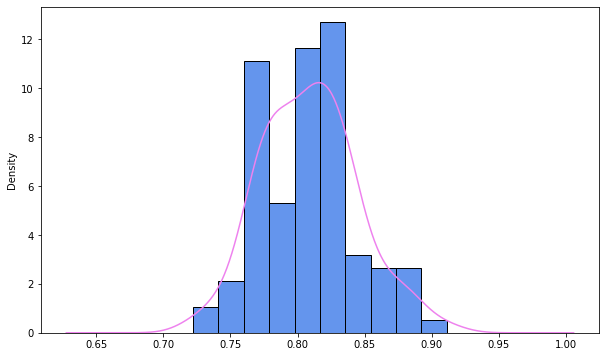

In [1178]:
plt.figure(figsize=(10,6))
plt.hist(LR_accuracy_scores, density=True, color='cornflowerblue', edgecolor='k' )
LR_accuracy_scores.plot(kind='kde',color='violet')

<BarContainer object of 6 artists>

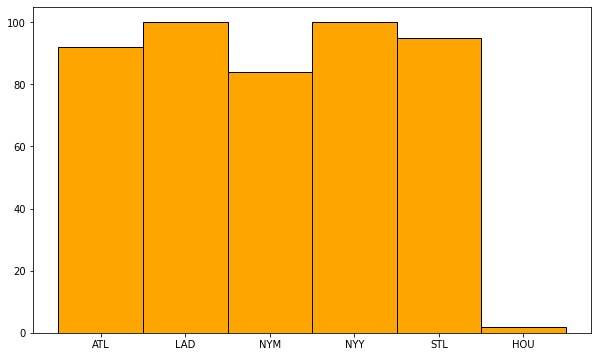

In [1179]:
plt.figure(figsize=(10,6))
teamArr = list(MLB_abr_map[teamName] for teamName in LR_2022_Predictions.keys())
plt.bar(teamArr,LR_2022_Predictions.values(), width=1.0, color='orange', edgecolor='k')

# Support Vector Machines

In [1180]:
SVM_Data = AdvancedBattingDf.drop(['Year','Tm'], axis = 1)
SVM_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rOBA     600 non-null    float64
 1   Rbat+    600 non-null    int64  
 2   BAbip    600 non-null    float64
 3   ISO      600 non-null    float64
 4   HR%      600 non-null    float64
 5   SO%      600 non-null    float64
 6   BB%      600 non-null    float64
 7   LD%      600 non-null    float64
 8   GB%      600 non-null    float64
 9   FB%      600 non-null    float64
 10  GB/FB    600 non-null    float64
 11  Pull%    600 non-null    float64
 12  Cent%    600 non-null    float64
 13  Oppo%    600 non-null    float64
 14  WPA      600 non-null    float64
 15  cWPA     600 non-null    float64
 16  RE24     600 non-null    float64
 17  RS%      600 non-null    float64
 18  SB%      600 non-null    float64
 19  XBT%     600 non-null    float64
 20  Playoff  600 non-null    object 
dtypes: float64(19), 

In [1181]:
X_SVM = SVM_Data.drop('Playoff', axis=1)
Y_SVM = SVM_Data.Playoff

In [1182]:
SVM_accuracy_scores=[]
n_iterations = 100
SVM_ml = svm.NuSVC(gamma='auto')
X_SVM = scaler.fit_transform(X_SVM)

In [1183]:
SVM_2022_predictions = dict()

SVM_2022_Data = data2022.drop(['Tm','HardH%','EV','G'], axis = 1)
SVM_2022_Data = scaler.transform(SVM_2022_Data)

In [1184]:
for iteration in range(n_iterations):
  SVM_X_train, SVM_X_test, SVM_Y_train, SVM_Y_test = train_test_split(X_SVM,Y_SVM, test_size=0.5)
  SVM_ml.fit(SVM_X_train, SVM_Y_train)

  predicted_SVM = SVM_ml.predict(SVM_X_test)
  SVM_accuracy_scores.append(metrics.accuracy_score(SVM_Y_test, predicted_SVM))

  SVM_preds=SVM_ml.predict(SVM_2022_Data)
  SVM_2022_Df = pd.DataFrame({'2022 Teams': data2022.Tm, 'Playoff Predictions':SVM_preds})

  teams_to_add = SVM_2022_Df.loc[SVM_2022_Df['Playoff Predictions']=='Yes']['2022 Teams']

  for team in teams_to_add:
    if team in SVM_2022_predictions.keys():
      SVM_2022_predictions[team] = SVM_2022_predictions[team] + 1
    else:
      SVM_2022_predictions[team] = 1

SVM_2022_predictions

{'Los Angeles Dodgers': 100,
 'New York Mets': 71,
 'New York Yankees': 74,
 'Atlanta Braves': 25,
 'San Diego Padres': 15,
 'Arizona Diamondbacks': 9,
 'St. Louis Cardinals': 22,
 'Houston Astros': 12}

In [1185]:
SVM_accuracy_scores = pd.Series(SVM_accuracy_scores)
SVM_accuracy_scores.describe()

count    100.000000
mean       0.812567
std        0.025047
min        0.746667
25%        0.795833
50%        0.813333
75%        0.830833
max        0.860000
dtype: float64

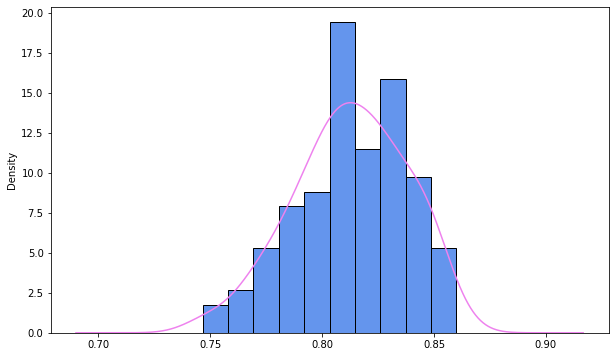

In [1186]:
plt.figure(figsize=(10,6))
plt.hist(SVM_accuracy_scores, density=True, color='cornflowerblue', edgecolor='k' )
SVM_accuracy_scores.plot(kind='kde',color='violet')

<BarContainer object of 8 artists>

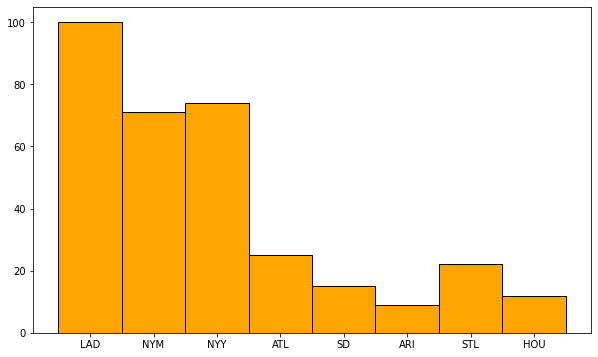

In [1187]:
plt.figure(figsize=(10,6))
teamArr = list(MLB_abr_map[teamName] for teamName in SVM_2022_predictions.keys())
plt.bar(teamArr,SVM_2022_predictions.values(), width=1.0, color='orange', edgecolor='k')

# Random Forest

In [1188]:
RF_Data = AdvancedBattingDf.drop(['Year','Tm'], axis = 1)
RF_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rOBA     600 non-null    float64
 1   Rbat+    600 non-null    int64  
 2   BAbip    600 non-null    float64
 3   ISO      600 non-null    float64
 4   HR%      600 non-null    float64
 5   SO%      600 non-null    float64
 6   BB%      600 non-null    float64
 7   LD%      600 non-null    float64
 8   GB%      600 non-null    float64
 9   FB%      600 non-null    float64
 10  GB/FB    600 non-null    float64
 11  Pull%    600 non-null    float64
 12  Cent%    600 non-null    float64
 13  Oppo%    600 non-null    float64
 14  WPA      600 non-null    float64
 15  cWPA     600 non-null    float64
 16  RE24     600 non-null    float64
 17  RS%      600 non-null    float64
 18  SB%      600 non-null    float64
 19  XBT%     600 non-null    float64
 20  Playoff  600 non-null    object 
dtypes: float64(19), 

In [1189]:
X_RF = RF_Data.drop('Playoff', axis=1)
Y_RF = RF_Data.Playoff

RF_2022_Data = data2022.drop(['Tm','HardH%','EV','G'], axis = 1)

RF_ml = RandomForestClassifier( n_estimators=50, oob_score=True, bootstrap=True, min_samples_split=5)

In [1190]:
RF_accuracy_scores = []
n_iterations=100
RF_2022_Predictions = dict()

for iteration in range(n_iterations):
  RF_X_train, RF_X_test, RF_Y_train, RF_Y_test = train_test_split(X_RF,Y_RF, test_size=0.25)
  RF_ml.fit(RF_X_train, RF_Y_train)

  predicted_RF = RF_ml.predict(RF_X_test)
  RF_accuracy_scores.append(metrics.accuracy_score(RF_Y_test, predicted_RF))

  RF_preds=RF_ml.predict(RF_2022_Data)

  RF_2022_Df = pd.DataFrame({'2022 Teams': data2022.Tm, 'Playoff Predictions':RF_preds})

  teams_to_add = RF_2022_Df.loc[RF_2022_Df['Playoff Predictions']=='Yes']['2022 Teams']

  for team in teams_to_add:
    if team in RF_2022_Predictions.keys():
      RF_2022_Predictions[team] = RF_2022_Predictions[team] + 1
    else:
      RF_2022_Predictions[team] = 1

RF_2022_Predictions

{'Los Angeles Dodgers': 100,
 'New York Mets': 99,
 'New York Yankees': 98,
 'Atlanta Braves': 17,
 'San Francisco Giants': 8,
 'Houston Astros': 9,
 'Philadelphia Phillies': 3}

In [1191]:
RF_accuracy_scores = pd.Series(RF_accuracy_scores)
RF_accuracy_scores.describe()

count    100.000000
mean       0.836733
std        0.025168
min        0.760000
25%        0.820000
50%        0.833333
75%        0.853333
max        0.886667
dtype: float64

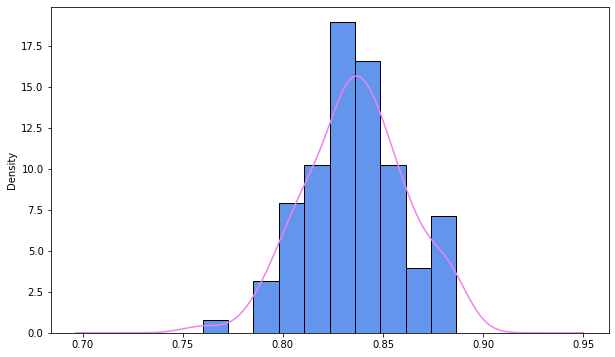

In [1192]:
plt.figure(figsize=(10,6))
plt.hist(RF_accuracy_scores, density=True, color='cornflowerblue', edgecolor='k' )
RF_accuracy_scores.plot(kind='kde',color='violet')

<BarContainer object of 7 artists>

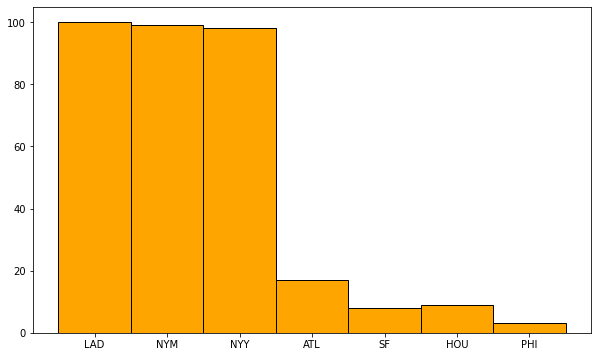

In [1193]:
plt.figure(figsize=(10,6))
teamArr = list(MLB_abr_map[teamName] for teamName in RF_2022_Predictions.keys())
plt.bar(teamArr,RF_2022_Predictions.values(), width=1.0, color='orange', edgecolor='k')